In [1]:
import math,re
import matplotlib.pyplot as PLT
import numpy as NP
import random as RN
%matplotlib inline

In [2]:
# This document is based on my note of reviewing Advanced Engineering Mathematics
# by Kreyszig 9th and Numerical Methods Using Matlab by Mathew & Fink. 
#
# Here is based on 19th chapter

# Functions using here

In [3]:

def func_xm(x,func_param):
    # function of x by m order.
    # How many params means how many order-1. 
    # When y=ax+b, func_param should include 2 variables as [b,a].
    num_result = 0.0
    for n in range(len(func_param)):
        num_result += func_param[n] * x ** n
    return num_result

def func_xm_dx(x,func_param):
    # function of x by m order and dx.
    # How many params means how many order-1. 
    # When y=ax+b, func_param should include 2 variables as [b,a].
    num_result = 0.0
    for n in range(1,len(func_param)):
        num_result += n*func_param[n] * x ** (n-1)
    return num_result

In [4]:
def get_function(arr_xlim, func_f, func_param, dx=1.0):
    dx   = dx
    arr_y=[]
    arr_x=list(range(arr_xlim[0],arr_xlim[1],1))
    for n in range(len(arr_x)): arr_x[n] = arr_x[n]/dx
    for x in arr_x:
        arr_y.append(func_f(x, func_param))
    return arr_x, arr_y

In [5]:
def get_ans_fixpoint(x0, function, func_param):
    arr_x_out=[x0]
    for n in range(10):
        arr_x_out.append(function(arr_x_out[n], func_param))
    return arr_x_out

In [6]:
def func_hyperbo_x(x,func_param):
    return func_param[2]*x**2 + func_param[1]*x + func_param[0]

def func_hyperbo_x_dx(x,func_param):
    return 2*func_param[1]*x + func_param[0]

def func_strait_x(x,func_param):
    return func_param[1] * x + func_param[0]

def get_func_straitlized_inform(func, func_dx, func_param, x0=0 ):
    num_y0 = func(x0, func_param)
    num_b  = func(x0, func_param) - func_dx(x0, func_param) * x0
    num_a  = func_dx(x0, func_param)
    return num_b, num_a

In [7]:
def newton_raphson(x0, func, func_dx, func_param):
    x1 = x0 - func(x0,func_param) / func_dx(x0, func_param)
    return x1

In [8]:
def arr_x_y(func,func_param=[],arr_xlim=[]):
    # get list of y from func(x) within the range of xlim
    arr_out=[]
    if arr_xlim == []:
        arr_xlim = [-10,10,0.1]
    if func_param == []:
        for n in NP.arange(arr_xlim[0], arr_xlim[1], arr_xlim[2]):
            arr_out.append(func(n))
    else:
        for n in NP.arange(arr_xlim[0], arr_xlim[1], arr_xlim[2]):
            arr_out.append(func(n, func_param))
    return arr_out

In [12]:
def full_NewtonRaphson(func, func_dx, func_param, x0, arr_xlim=[], num_iter=10):
    # Findning the root from Newton-Raphson method
    arr_x          = list(NP.arange(arr_xlim[0],arr_xlim[1],arr_xlim[2]))
    arr_y          = []
    
    
    arr_x0         = [x0]
    arr_num_b_a    = [] 
    
    for n in range(len(arr_x)): arr_y.append(func(arr_x[n],func_param))
    
        
    PLT.plot(arr_x,arr_y,'b')
    PLT.plot(arr_x,[0.0 for n in range(len(arr_x))], "r")
    print("---------------------Result start of line------------------")
    for d in range(1,num_iter):
        
        arr_y_dx       = []
        arr_y_dx_line0 = []
        for n in range(len(arr_x)): 
            arr_y_dx.append(func_dx(arr_x[n],func_param))
        
        arr_num_b_a .append(get_func_straitlized_inform(func, func_dx, func_param, x0=arr_x0[d-1]))
        for n in range(len(arr_x)): 
            arr_y_dx_line0.append(func_strait_x(arr_x[n], arr_num_b_a[d-1]))
        x1_0 = newton_raphson(arr_x0[d-1], func, func_dx, func_param)
        arr_x0.append(x1_0)
        num_err = arr_x0[d] - arr_x0[d-1]
        
        print("xn= ",arr_x0[d-1], "err= ", num_err )
    
        PLT.plot(arr_x,arr_y_dx_line0,"g:")
        PLT.plot(arr_x0[d-1], func(arr_x0[d-1], func_param), "ko",fillstyle='none' )
        PLT.plot(arr_x0[d]  , func(arr_x0[d], func_param)  , "ko",fillstyle='none' )

    print("---------------------Result end of line------------------")

In [13]:
# Examples
def func_sinx(x,func_param):
    #a x + b sin(c x) + d
    return func_param[0] * x + func_param[1] * math.sin(func_param[2]*x) + func_param[3]

def func_sinx_dx(x,func_param):
    return func_param[0] + func_param[1] * func_param[2] * math.cos(func_param[2]*x)

---------------------Result start of line------------------
xn=  0.5 err=  -0.6076168810751763
xn=  -0.10761688107517631 err=  0.10845653643856883
xn=  0.0008396553633925191 err=  -0.0008396557580426178
xn=  -3.946500987334414e-10 err=  3.946500987334414e-10
xn=  0.0 err=  0.0
xn=  0.0 err=  0.0
xn=  0.0 err=  0.0
xn=  0.0 err=  0.0
xn=  0.0 err=  0.0
---------------------Result end of line------------------


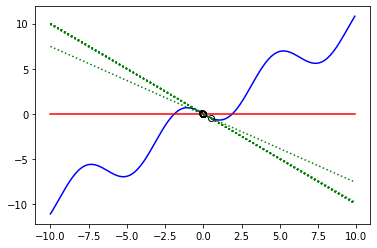

In [14]:
# TEST OF FUNCTION
arr_x = list(NP.arange(-10,10,0.1))
arr_y=[]
func_param=[1,-2,1,0]
for n in range(len(arr_x)): arr_y.append(func_sinx(arr_x[n],func_param))
full_NewtonRaphson(func_sinx, func_sinx_dx, func_param, x0=0.5, arr_xlim=[-10,10,0.1], num_iter=10)

## The Least Squares Methods:
### M&F, Chapter 5

$$ y_k = A x_k + B $$
$$ (\sum x_k^2) A + (\sum x_k) B = (\sum x_k y_k) $$
$$ (\sum x_k) A + NB = (\sum y_k) $$

$$ E(A,B) = (\sum (A x_k + B - y_k) ^2 = \sum d_k^2 $$
$$ \frac{\partial E(A,B)}{\partial A} = \sum 2(A x_k + B - y_k)(x_k) = 0 $$
$$ \frac{\partial E(A,B)}{\partial B} = \sum 2(A x_k + B - y_k) = 0 $$
$$ (1) A \sum x_k ^2 + B \sum x_k - \sum x_k y_k = 0$$
$$ (2) A \sum x_k  +  \sum B - \sum y_k = 0$$

In [15]:
def sum_sq(arr_in):
    num_ans = 0
    for n in range(len(arr_in)):
        num_ans += arr_in[n] ** 2
    return num_ans
def sum_xy(arr_in1, arr_in2):
    num_ans = 0
    for n in range(len(arr_in1)):
        num_ans += arr_in1[n] * arr_in2[n] 
    return num_ans

In [16]:
def finding_AXB_LSM(arr_in1, arr_in2):
    #arr_in1 = X, arr_in2 = Y
    err = 0
    C1 = sum_sq(x)
    C2 = sum(x)
    C3 = sum_xy(x,y)
    
    C4 = C2
    C5 = len(arr_in1)
    C6 = sum(arr_in2)
    
    if C1 == 0:
        B = float(C3)/float(C2)
        A = (C6-C5*B)/float(C4)
    elif C4 ==0:
        B = float(C6)/float(C5)
        A = (C3-C2*B)/float(C1)
    else:
        C5P = C5 - C2 * C4 / C1
        C6P = C6 - C3 * C4 / C1
        B   = C6P/C5P
        A   = (C3-C2*B)/C1
    
    return A,B,err

In [17]:
# Gauss-Jordan Elimination
def GaussJordanEli(arr_in):
    # First check array dimention
    num_ydim = len(arr_in)
    num_xdim = len(arr_in[0])
    arr_out = arr_in
    
    if num_ydim -num_xdim == 0 or num_xdim - num_ydim == 1:
        arr_i   = NP.array([[0.0 for j in range(num_ydim)] for i in range(num_ydim)])
        for ny in range(num_ydim):
            arr_i[ny][ny] = 1.0
        print(arr_i)
        for nx in range(num_xdim):                        
            for ny in range(nx+1, num_ydim):
                arr_i  [ny] = arr_i  [ny] - arr_i  [nx] * arr_out[ny][nx] / float(arr_out[nx][nx])
                arr_out[ny] = arr_out[ny] - arr_out[nx] * arr_out[ny][nx] / float(arr_out[nx][nx])
        if num_xdim - num_ydim == 1:
            for nx in range(num_xdim-1,-1,-1):                        
                for ny in range(num_ydim-1,nx, -1):
                    print(nx,ny)
                    arr_i  [nx] = arr_i  [nx] - arr_i  [ny] * arr_out[nx][ny] / float(arr_out[ny][ny])
                    arr_out[nx] = arr_out[nx] - arr_out[ny] * arr_out[nx][ny] / float(arr_out[ny][ny])
        else:
            for nx in range(num_xdim,-1,-1):                        
                for ny in range(num_ydim-1, nx, -1):
                    print(nx,ny)
                    arr_i  [nx] = arr_i  [nx] - arr_i  [ny] * arr_out[nx][ny] / float(arr_out[ny][ny])
                    arr_out[nx] = arr_out[nx] - arr_out[ny] * arr_out[nx][ny] / float(arr_out[ny][ny])
                
        if num_xdim - num_ydim == 1:
            arr_sol = [0.0 for n in range(num_ydim)]
            for ny in range(num_ydim):
                arr_sol[ny] = arr_out[ny][num_xdim-1]/arr_out[ny][ny]
            return arr_out, arr_i, arr_sol
        else:
            return arr_out, arr_i
    else:
        print("Y dim: {0:d}, X dim: {1:d}: can not apply Gaussian-Jordan".format(num_ydim, num_xdim))
        return [0]

In [18]:
def finding_XM_LSM(arr_in1, arr_in2, m=2):
    # Finding the by least square method
    arr_out=[[0.0 for i in range(m+2)] for j in range(m+1)]
    arr_x_power_m  = [0.0 for i in range(m+m+1)]
    arr_xy_power_m = [0.0 for i in range(m+1)]
    for n in range(len(arr_x_power_m)):
        for x in range(len(arr_in1)):
            arr_x_power_m[n] += arr_in1[x] ** n
    
    for n in range(len(arr_xy_power_m)):
        for x in range(len(arr_in1)):
            arr_xy_power_m[n] += arr_in1[x] ** n * arr_in2[x]
    
    for j in range(m+1):
        for i in range(j,j+m+1):
            arr_out[j][i-j] = arr_x_power_m[i]
        arr_out[j][m+1]   = arr_xy_power_m[j]
    
    return arr_out

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
2 3
1 3
1 2
0 3
0 2
0 1
[8.489051718380832, 23.6749041109296, -12.639887625996979, -4.28437422981001]


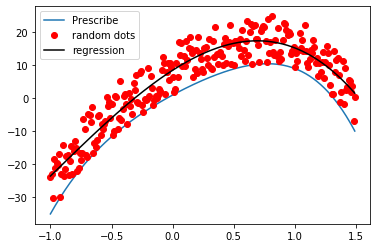

In [22]:

# Example 1
arr_x = NP.arange(-1,1.5,0.01)
func_param=[1,20,-8,2,-6]
arr_y = arr_x_y(func_xm, func_param, arr_xlim=[-1,1.5,0.01])
arr_y2 = [0.0 for n in range(len(arr_y))]
for n in range(len(arr_y2)):
    arr_y2[n] += arr_y[n] + RN.random()*15
                           
#print(arr_y)
PLT.plot(arr_x,arr_y)
PLT.plot(arr_x, arr_y2, "ro")
arr_b = finding_XM_LSM(arr_x,arr_y2, m=3)
s=GaussJordanEli(NP.array(arr_b))[2]
print(s)
arr_lineYX = arr_x_y(func_xm,func_param=s, arr_xlim=[-1,1.5,0.01])
#PLT.plot(x,y,"ro")

#print(arr_lineYX)
PLT.plot(list(NP.arange(-1,1.5,0.01)),arr_lineYX, "k")
PLT.legend(["Prescribe","random dots","regression"])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
2 3
1 3
1 2
0 3
0 2
0 1
[2.8464240325824854, 0.04818734017380904, 0.21133491199837, -0.005977306159431835]


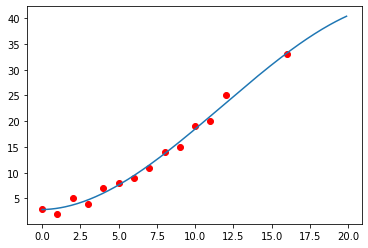

In [35]:
# Example 2
arr_x = [0,1,2,3,4,5,6, 7, 8, 9,10,11,12,16]
arr_y = [3,2,5,4,7,8,9,11,14,15,19,20,25,33]
PLT.plot(arr_x, arr_y,"ro")
arr_b = finding_XM_LSM(arr_x,arr_y, m=3)
s=GaussJordanEli(NP.array(arr_b))[2]
print(s)
arr_lineYX = arr_x_y(func_xm,func_param=s, arr_xlim=[0,20,0.1])
PLT.plot(list(NP.arange(0,20,0.1)),arr_lineYX)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
4 5
3 5
3 4
2 5
2 4
2 3
1 5
1 4
1 3
1 2
0 5
0 4
0 3
0 2
0 1
[502.72549019605805, -398.9418313884206, 445.8490116694448, -63.43666150670795, 5.06799237913789, -0.1396463443677066]


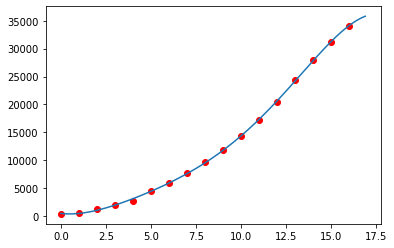

In [49]:
# Example 2
arr_x = [0,1,2,3,4,5,6, 7, 8, 9,10,11,12,13,14,15,16]
arr_y = [440,517,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24313,28007,31161,34121]
PLT.plot(arr_x, arr_y,"ro")
arr_b = finding_XM_LSM(arr_x,arr_y, m=5)
s=GaussJordanEli(NP.array(arr_b))[2]
print(s)
arr_lineYX = arr_x_y(func_xm,func_param=s, arr_xlim=[0,17,0.1])
PLT.plot(list(NP.arange(0,17,0.1)),arr_lineYX)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_lim'

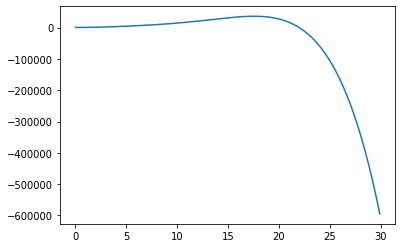

In [53]:
arr_lineYX = arr_x_y(func_xm,func_param=s, arr_xlim=[0,30,0.1])
PLT.plot(list(NP.arange(0,30,0.1)),arr_lineYX)
